In [10]:
from datetime import datetime
import csv
import pandas as pd

df = pd.read_csv('time.csv',sep=',',names=['vial','row','col','time'])

In [18]:
penfill = df[df['vial'] == 1]
pfs = df[df['vial'] == 2]

In [59]:
penfill['total_sec'] = penfill['time'].apply(lambda x: datetime.strptime(x, '%H:%M:%S.%f').time())
pfs['total_sec'] = pfs['time'].apply(lambda x: datetime.strptime(x, '%H:%M:%S.%f').time())

C:\Users\IVSN\AppData\Local\Temp\ipykernel_8360\2416766352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penfill['total_sec'] = penfill['time'].apply(lambda x: datetime.strptime(x, '%H:%M:%S.%f').time())
C:\Users\IVSN\AppData\Local\Temp\ipykernel_8360\2416766352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pfs['total_sec'] = pfs['time'].apply(lambda x: datetime.strptime(x, '%H:%M:%S.%f').time())


In [60]:
penfill['total_sec'] = penfill['total_sec'].apply(lambda x: x.second + x.minute*60 + x.microsecond/1000000)
pfs['total_sec'] = pfs['total_sec'].apply(lambda x: x.second + x.minute*60 + x.microsecond/1000000)

C:\Users\IVSN\AppData\Local\Temp\ipykernel_8360\437950482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penfill['total_sec'] = penfill['total_sec'].apply(lambda x: x.second + x.minute*60 + x.microsecond/1000000)
C:\Users\IVSN\AppData\Local\Temp\ipykernel_8360\437950482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pfs['total_sec'] = pfs['total_sec'].apply(lambda x: x.second + x.minute*60 + x.microsecond/1000000)


In [61]:
pfs

,vial,row,col,time,total_sec
0,2,0,0,0:00:41.192549,41.192549
1,2,0,1,0:00:41.330771,41.330771
2,2,0,2,0:00:42.320355,42.320355
3,2,0,3,0:00:42.443454,42.443454
4,2,0,4,0:00:41.488940,41.488940
...,...,...,...,...,...
127,2,21,1,0:00:47.013501,47.013501
128,2,21,2,0:00:44.088331,44.088331
129,2,21,3,0:00:46.212583,46.212583
130,2,21,4,0:00:45.320620,45.320620


In [72]:
print(pfs.total_sec.mean(),
pfs.total_sec.std()
)
print(penfill.total_sec.mean(),
penfill.total_sec.std()
)
print(penfill.total_sec.max(),
penfill.total_sec.min()
)
print(pfs.total_sec.max(),
pfs.total_sec.min()
)

43.47043943181818 1.2996815908493118
58.40334614102564 1.143983611431548
61.33142 55.625995
47.493635 41.192549


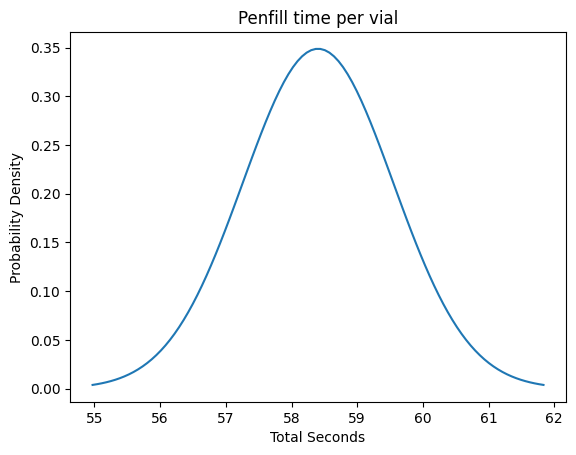

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'total_sec' is a column in the 'penfill' DataFrame

# Calculate mean and standard deviation
mean = penfill['total_sec'].mean()
std = penfill['total_sec'].std()

# Generate data points for x-axis
x = np.linspace(mean - 3*std, mean + 3*std, 100)

# Compute corresponding y-values using Gaussian distribution formula
y = np.exp(-(x - mean)**2 / (2*std**2)) / (std * np.sqrt(2*np.pi))

# Plot the Gaussian distribution
plt.plot(x, y)
plt.xlabel('Total Seconds')
plt.ylabel('Probability Density')
plt.title('Penfill time per vial')
plt.show()

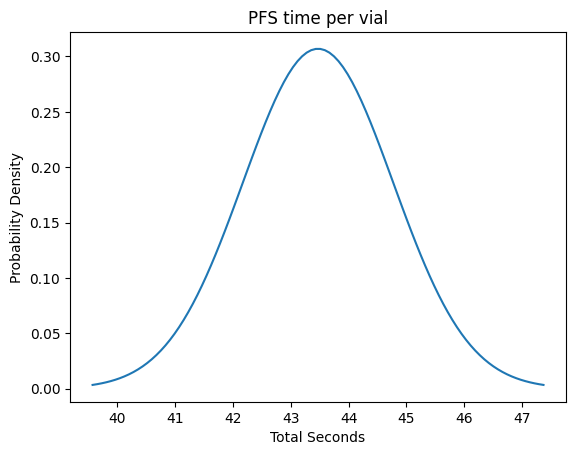

In [68]:


# Assuming 'total_sec' is a column in the 'penfill' DataFrame

# Calculate mean and standard deviation
mean = pfs['total_sec'].mean()
std = pfs['total_sec'].std()

# Generate data points for x-axis
x = np.linspace(mean - 3*std, mean + 3*std, 100)

# Compute corresponding y-values using Gaussian distribution formula
y = np.exp(-(x - mean)**2 / (2*std**2)) / (std * np.sqrt(2*np.pi))

# Plot the Gaussian distribution
plt.plot(x, y)
plt.xlabel('Total Seconds')
plt.ylabel('Probability Density')
plt.title('PFS time per vial')
plt.show()

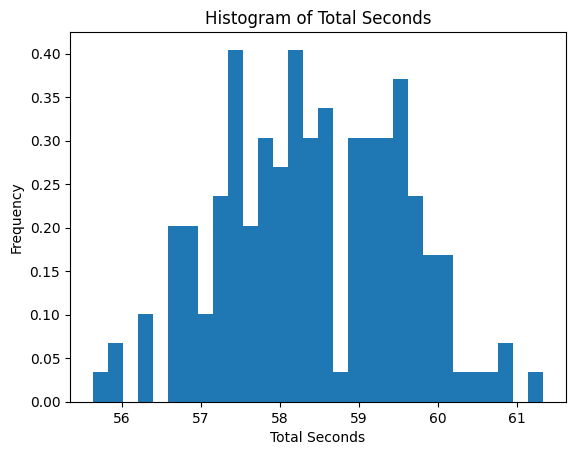

In [85]:

# Create histogram
plt.hist(penfill['total_sec'], bins=30, density=True)

# Set axis labels and title
plt.xlabel('Total Seconds')
plt.ylabel('Frequency')
plt.title('Histogram of Total Seconds')

# Display the plot
plt.show()

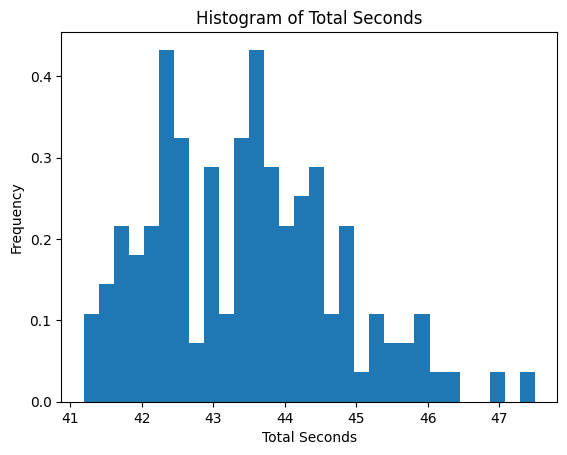

In [79]:
# Create histogram
plt.hist(pfs['total_sec'], bins=30, density=True)

# Set axis labels and title
plt.xlabel('Total Seconds')
plt.ylabel('Frequency')
plt.title('Histogram of Total Seconds')

# Display the plot
plt.show()